In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [2]:
from tensorflow.keras.datasets import imdb
(x_train, y_train) , (x_test,y_test) = imdb.load_data(num_words=10000)

print("training samples: ", x_train[0])
print("testing samples: ", y_train)

training samples:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
testing samples:  [1 0 0 ... 0 1 0]


In [3]:
print(x_train[0])
print("label:", y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
label: 1


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length= 200

X_train = pad_sequences(x_train, maxlen=max_length)
X_test = pad_sequences(x_test, maxlen=max_length)

print(X_train.shape)

(25000, 200)


In [5]:
print("First padded review:")
print(X_train[0])

First padded review:
[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  103 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAvgPool1D, Dense

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=200),
    GlobalAvgPool1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5516 - loss: 0.6913 - val_accuracy: 0.7100 - val_loss: 0.6795
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7063 - loss: 0.6735 - val_accuracy: 0.7274 - val_loss: 0.6453
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7445 - loss: 0.6313 - val_accuracy: 0.7744 - val_loss: 0.5868
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7800 - loss: 0.5689 - val_accuracy: 0.8016 - val_loss: 0.5161
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8236 - loss: 0.4918 - val_accuracy: 0.8318 - val_loss: 0.4531
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8457 - loss: 0.4269 - val_accuracy: 0.8416 - val_loss: 0.4093
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8582 - loss: 0.3827 - val_accuracy: 0.8546 - val_loss: 0.3747
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8734 - loss: 0.3422 - val_accuracy: 0.8596 - v

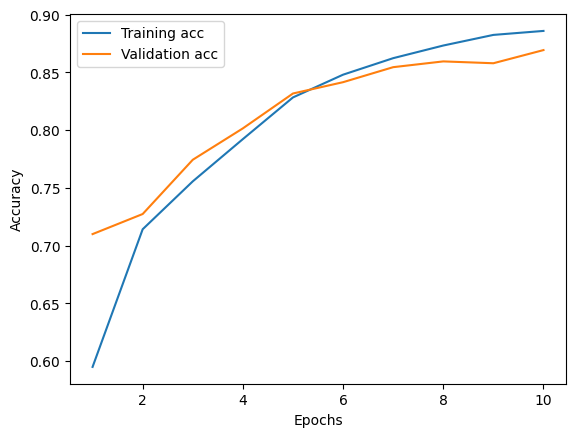

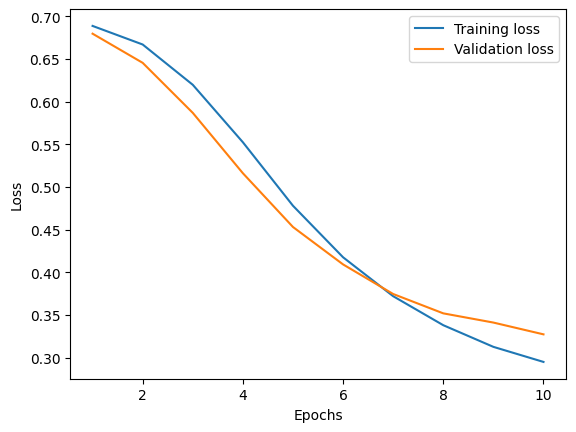

In [8]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.figure()
plt.plot(epochs, acc, label="Training acc")
plt.plot(epochs, val_acc, label="Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5089 - loss: 0.6923 - val_accuracy: 0.5070 - val_loss: 0.6868
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5782 - loss: 0.6833 - val_accuracy: 0.6718 - val_loss: 0.6654
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6831 - loss: 0.6577 - val_accuracy: 0.6894 - val_loss: 0.6282
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7255 - loss: 0.6187 - val_accuracy: 0.7962 - val_loss: 0.5758
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7750 - loss: 0.5663 - val_accuracy: 0.8334 - val_loss: 0.5185
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8053 - loss: 0.5097 - val_accuracy: 0.8396 - val_loss: 0.4638
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8264 - loss: 0.4613 - val_accuracy: 0.8534 - val_loss: 0.4231
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8441 - loss: 0.4212 - val_accuracy: 0.8600 - v

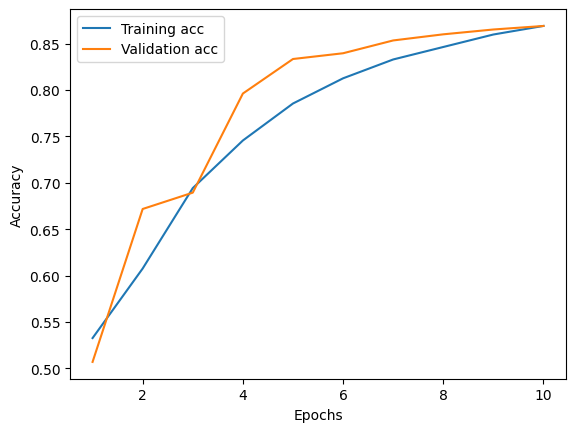

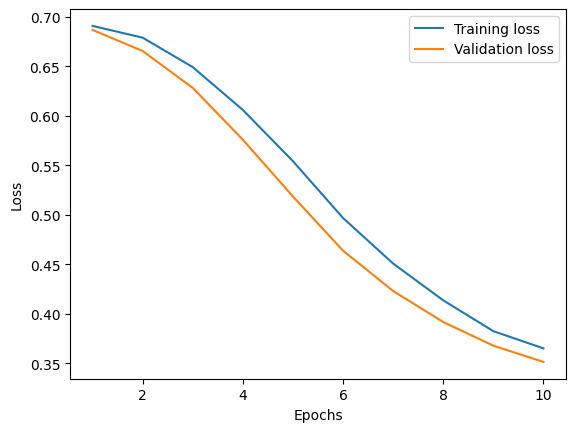

In [9]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=200),
    GlobalAvgPool1D(),
    Dense(16, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print("Improved Test Accuracy:", accuracy)

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.figure()
plt.plot(epochs, acc, label="Training acc")
plt.plot(epochs, val_acc, label="Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [15]:
model.save("text_sentiment_model.keras")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,869 (1.83 MB)

 Trainable params: 160,289 (626.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,580 (1.22 MB)

In [11]:
from tensorflow.keras.models import load_model
model = load_model("text_sentiment_model.keras")

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

word_index = imdb.get_word_index()
def encode(text):
  tokens = text.lower().split()
  encoded_text = []
  for word in tokens:
    if word in word_index and word_index[word] < 10000:
      encoded_text.append(word_index[word]+3)
    else:
      encoded_text.append(2)
  padded = pad_sequences([encoded_text], maxlen=200)
  return padded






In [12]:
#manual testing

text = "the movie was great"
encoded_text = encode(text)

prediction = model.predict(encoded_text)
print("prediction score:",prediction)

if prediction > 0.5:
  print("positive review")
else:
  print("negative review")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
prediction score: [[0.6630064]]
positive review


In [14]:
text = input("How was the movie? ")
encoded_text = encode(text)

prediction = model.predict(encoded_text)
if prediction > 0.5:
  print("positive review")
else:
  print("negative review")

How was the movie? bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
negative review
